In [4]:
# opXRD: How to load the database

from tabulate import tabulate
from opxrd import OpXRD
from xrdpattern.pattern import PatternDB

opxrd_location = '/tmp/opxrd'

In [ ]:
# opXRD: Show database statistics

opxrd = OpXRD.load(root_dirpath=opxrd_location)
attrs = ['primary_phase.spacegroup', 'num_entries', 'startval', 'endval']
opxrd.plot_quantity(attrs=attrs, save_fpath='/tmp/quantities_hist.png')

In [5]:
from xrdpattern.xrd import LabelType

def print_label_fractions(dbs : list[PatternDB]):
    db_groups = {}
    for db in dbs:
        three_letter_name = db.name[:4]
        if not three_letter_name in db_groups:
            db_groups[three_letter_name] = [db]
        else:
            db_groups[three_letter_name].append(db)
    
    merged_dbs = []
    for name, g in db_groups.items():
        merged = PatternDB.merge(dbs=g)
        merged.name = name
        merged_dbs.append(merged)
    
    table_data = []
    for d in merged_dbs:
        label_counts = {l : 0 for l in LabelType}
        patterns = d.patterns
        for l in LabelType:
            for p in patterns:
                if p.has_label(label_type=l):
                    label_counts[l] += 1
        db_percentages = [label_counts[l]/len(patterns) for l in LabelType]
        table_data.append(db_percentages)

    col_headers = [label.name for label in LabelType]
    row_headers = [db.name for db in merged_dbs]
    
    table = tabulate(table_data, headers=col_headers, showindex=row_headers, tablefmt='psql') 
    print(table)

opxrd_dbs = OpXRD.as_database_list(root_dirpath='/tmp/opxrd')
print_label_fractions(dbs=opxrd_dbs)

  0% (0 of 9569) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

- Loading databases from /tmp/opxrd


100% (9569 of 9569) |####################| Elapsed Time: 0:00:21 Time:  0:00:210001
100% (64 of 64) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (21 of 21) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (406 of 406) |######################| Elapsed Time: 0:00:00 Time:  0:00:000000
100% (169 of 169) |######################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (169 of 169) |######################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (1052 of 1052) |####################| Elapsed Time: 0:00:05 Time:  0:00:050000
100% (10227 of 10227) |##################| Elapsed Time: 0:00:22 Time:  0:00:220001
100% (364 of 364) |######################| Elapsed Time: 0:00:00 Time:  0:00:000:00


+------+----------+-----------+---------------+---------------+
|      |      spg |   lattice |   atom_coords |   composition |
|------+----------+-----------+---------------+---------------|
| INT_ | 0        |  0        |      0        |      0        |
| IKFT | 0        |  0        |      0        |      0        |
| HKUS | 0        |  1        |      1        |      0        |
| EMPA | 0.631169 |  0        |      0        |      0.997403 |
| USC_ | 1        |  0.899408 |      0        |      1        |
| CNRS | 1        |  1        |      0.846958 |      0.846958 |
+------+----------+-----------+---------------+---------------+


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



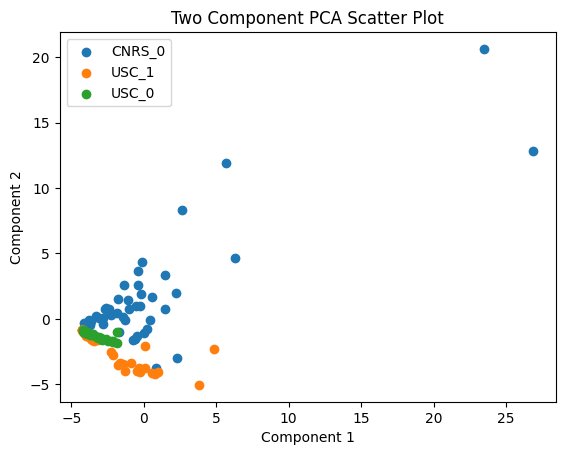

In [9]:
# opXRD: Two component PCA scatter plot

import matplotlib.pyplot as plt
from xrdpattern.pattern import PatternDB
from sklearn.decomposition import PCA
import numpy as np

def plot_pattern_dbs(dbs : list[PatternDB]):
    if len(dbs) == 0:
        raise ValueError('No databases provided')
    
    combined_y_list = []
    for db in dbs:
        patterns = db.patterns
        xy_list = [p.get_pattern_data(apply_constant_padding=True) for p in patterns]
        y_list = [y for x,y in xy_list]
        combined_y_list.extend(y_list)
        
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(combined_y_list)
    
    db_lens = [len(db.patterns) for db in dbs]
    max_points = 50
    for j, l in enumerate(db_lens):
        partial = transformed_data[:l]
        if l > max_points:
            indices = np.random.choice(len(partial), size=max_points, replace=False)
            partial = partial[indices]
        plt.scatter(partial[:, 0], partial[:, 1], label=dbs[j].name)
        
        transformed_data = transformed_data[l:]
        
    plt.title('Two Component PCA Scatter Plot')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    plt.savefig(f'/tmp/pca_scatter.png')
    
    plt.show()

usc_0 = PatternDB.load(dirpath=f'{opxrd_location}/USC_0')
usc_1 = PatternDB.load(dirpath=f'{opxrd_location}/USC_1')
hukust = PatternDB.load(dirpath=f'{opxrd_location}/HKUST_0')

plot_pattern_dbs(dbs=usc_0+usc_1+hukust)


In [ ]:
# Average dot product
usc_db = PatternDB.load(dirpath=f'{opxrd_location}/USC_0')
print(f'USC average dot product = {usc_db.get_average_dot_product()}')
usc_db.view_all()

In [1]:
# XrdPattern: Loading individual patterns

import sys

stdout = sys.stdout
from xrdpattern.pattern import XrdPattern
from xrdpattern.examples import DataExamples
pattern = XrdPattern.load(fpath=DataExamples.get_aimat_fpath())

sys.stdout = stdout

--- Successfully processed file ---
Data file path: /home/daniel/aimat/xrdpattern/xrdpattern/examples/aimat.json
Num errors: 0


In [9]:
#XrdPattern: Standardize

x1,y1, = pattern.get_pattern_data(apply_standardization=True)
print(f'Minimum, maximum value of y = {min(y1)}, {max(y1)}')
print(f'Two theta values start, end at {x1[0]}, {x1[-1]}')

Minimum, maximum value of y = 0.0, 1.0
Two theta values start, end at 0.0, 90.0


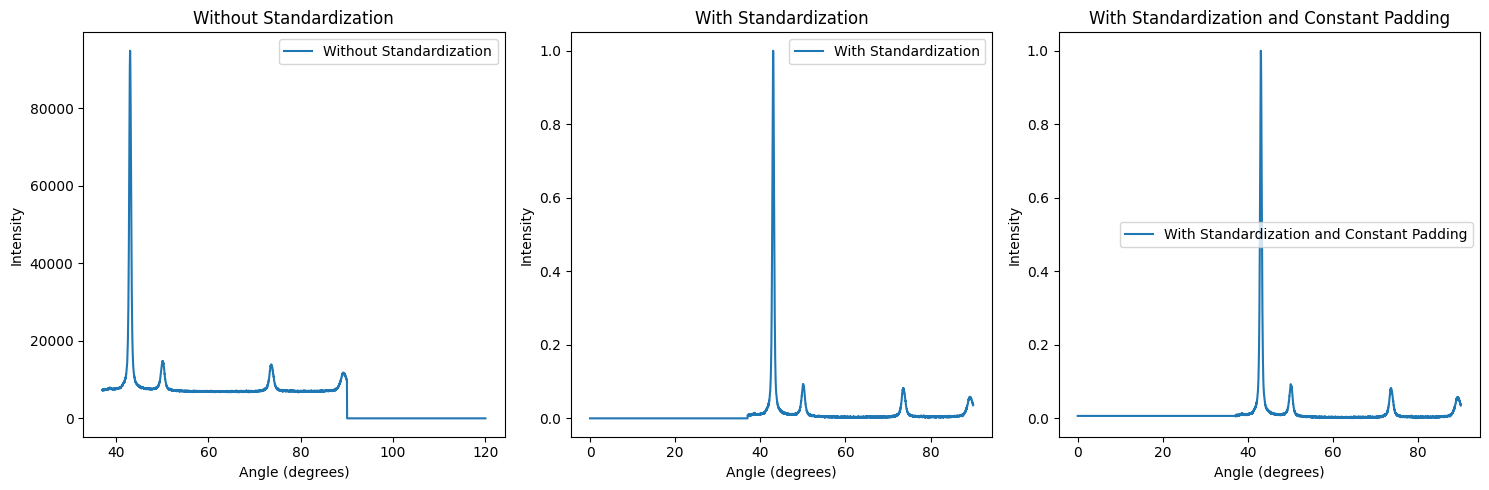

In [7]:
# XrdPattern: Plot patterns
a1, i1 = pattern.get_pattern_data(apply_standardization=False)
a2, i2 = pattern.get_pattern_data(apply_standardization=True)
a3, i3 = pattern.get_pattern_data(apply_standardization=True, apply_constant_padding=True)

plt.figure(figsize=(15, 5))
titles = ['Without Standardization', 'With Standardization', 'With Standardization and Constant Padding']
data = [(a1, i1), (a2, i2), (a3, i3)]

for idx, (angles, intensities) in enumerate(data):
    plt.subplot(1, 3, idx + 1)
    plt.plot(angles, intensities, label=titles[idx])
    plt.title(titles[idx])
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Intensity')
    plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# XrdPattern: To tensor (Coming soon!)
#import torch
#pattern.to_tensorpair(dtype=torch.float32, device=torch.device('cuda'))